In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
import warnings 
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import xgboost as xgb
import random
warnings.filterwarnings("ignore") 
%matplotlib inline

In [2]:
data = pd.read_csv('./perfect3.csv')

数据预处理

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   法院所属省                7864 non-null   object 
 1   法官姓名                 7864 non-null   object 
 2   法官性别预测               7864 non-null   object 
 3   法官女性                 7864 non-null   int64  
 4   判决时间                 7864 non-null   object 
 5   少数民族                 7864 non-null   int64  
 6   性别                   7864 non-null   int64  
 7   年龄                   7775 non-null   float64
 8   血液乙醇浓度(单位:mg/100ml)  7864 non-null   float64
 9   如实供述                 7864 non-null   int64  
 10  认罪认罚                 7864 non-null   int64  
 11  顶替                   7864 non-null   int64  
 12  逃逸                   7864 non-null   int64  
 13  高速道路                 7864 non-null   int64  
 14  事故                   7864 non-null   int64  
 15  伤亡情况                 7864 non-null   i

In [3]:
data = data.drop('缓刑',axis = 1)
data = data.dropna(axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7750 entries, 0 to 7863
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   法院所属省                7750 non-null   object 
 1   法官姓名                 7750 non-null   object 
 2   法官性别预测               7750 non-null   object 
 3   法官女性                 7750 non-null   int64  
 4   判决时间                 7750 non-null   object 
 5   少数民族                 7750 non-null   int64  
 6   性别                   7750 non-null   int64  
 7   年龄                   7750 non-null   float64
 8   血液乙醇浓度(单位:mg/100ml)  7750 non-null   float64
 9   如实供述                 7750 non-null   int64  
 10  认罪认罚                 7750 non-null   int64  
 11  顶替                   7750 non-null   int64  
 12  逃逸                   7750 non-null   int64  
 13  高速道路                 7750 non-null   int64  
 14  事故                   7750 non-null   int64  
 15  伤亡情况                 7750 non-null   i

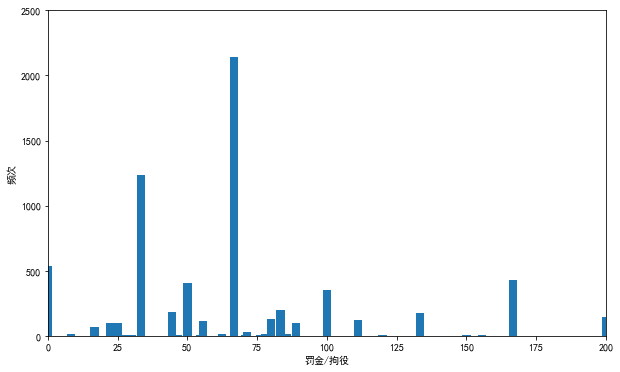

In [5]:
ratio = data['罚金(单位：元)']/data['拘役(天)']
frequency = {}
for item in ratio:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1
rati = []
freq = []
for i in frequency.keys():
    rati.append(i)
for i in frequency.values():
    freq.append(i)
i = 0
for i in range(0,82):
    if (freq[i]<100):
        del freq[i]
        del rati[i]
fig = plt.figure(figsize=(10,6))
plt.axis([0, 200, 0, 2500])
plt.xlabel('罚金/拘役')
plt.ylabel('频次')
plt.bar(rati, freq, width = 3)
plt.show()

In [4]:
data['拘役(天)'].unique()

array([ 30.,  45.,  60., 120.,  90., 150.,  75., 105.,  35., 100.,  70.,
        65.,  40.,  50., 135.,  43., 180.,  80.,  85., 110.,  38., 140.,
        34.,  55., 165.,  98., 160.,  72.,  36.,  95., 102., 130., 125.,
        93., 155.,  37.,  68.,  52.])

In [5]:
data = data.drop({'法官姓名','法官性别预测', '判决时间', '罚金(单位：元)'},axis = 1)

In [8]:
data.head()

,法院所属省,法官女性,少数民族,性别,年龄,血液乙醇浓度(单位:mg/100ml),如实供述,认罪认罚,顶替,逃逸,高速道路,事故,伤亡情况,全部责任,自首,谅解,无证驾驶,酒驾犯罪史,拘役(天)
0,江苏省,0,0,0,57.0,110.0,1,1,0,0,0,0,0,0,0,0,0,0,30.0
1,江苏省,0,0,0,52.0,115.2,1,1,0,0,0,1,0,0,0,0,0,0,45.0
2,江苏省,0,0,0,47.0,106.0,1,1,0,0,0,0,0,0,0,0,0,0,30.0
3,江苏省,0,0,0,25.0,156.9,1,1,0,0,0,1,0,0,0,0,0,0,60.0
4,江苏省,0,0,0,42.0,163.6,1,1,0,0,0,0,0,0,0,0,0,0,60.0


In [9]:
data['法院所属省'].unique()

array(['江苏省', '江西省', '福建省', '安徽省', '广西壮族自治区', '山东省', '陕西省', '浙江省', '甘肃省',
       '重庆市', '辽宁省', '吉林省', '宁夏回族自治区', '青海省', '湖北省', '内蒙古自治区', '四川省',
       '山西省', '河北省', '广东省', '新疆维吾尔自治区', '海南省', '湖南省', '云南省', '西藏自治区',
       '黑龙江省', '北京市'], dtype=object)

In [10]:
len1 = data['拘役(天)']
pinci = {}
for item in len1:
    if item in pinci:
        pinci[item] += 1
    else:
        pinci[item] = 1
pinci

{30.0: 2482,
 45.0: 826,
 60.0: 2001,
 120.0: 238,
 90.0: 818,
 150.0: 68,
 75.0: 361,
 105.0: 92,
 35.0: 76,
 100.0: 22,
 70.0: 99,
 65.0: 30,
 40.0: 277,
 50.0: 213,
 135.0: 18,
 43.0: 1,
 180.0: 3,
 80.0: 47,
 85.0: 13,
 110.0: 18,
 38.0: 2,
 140.0: 1,
 34.0: 1,
 55.0: 17,
 165.0: 6,
 98.0: 1,
 160.0: 1,
 72.0: 1,
 36.0: 1,
 95.0: 4,
 102.0: 1,
 130.0: 3,
 125.0: 2,
 93.0: 1,
 155.0: 1,
 37.0: 1,
 68.0: 2,
 52.0: 1}

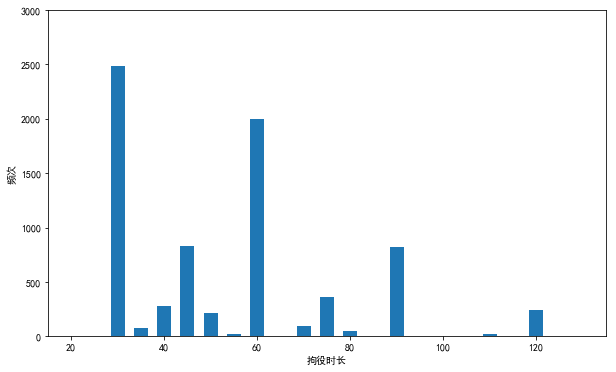

In [129]:
rati = []
freq = []
for i in pinci.keys():
    rati.append(i)
for i in pinci.values():
    freq.append(i)
i = 0
for i in range(0,22):
    if (freq[i]<200):
        del freq[i]
        del rati[i]
fig = plt.figure(figsize=(10,6))
plt.axis([15, 135, 0, 3000])
plt.xlabel('拘役时长')
plt.ylabel('频次')
plt.bar(rati, freq, width = 3)
plt.show()

In [6]:
province_map = {
    '江苏省' : 1, 
    '江西省' : 2, 
    '福建省' : 3, 
    '安徽省' : 4, 
    '广西壮族自治区' : 5, 
    '山东省' : 6, 
    '陕西省' : 7, 
    '浙江省' : 8, 
    '甘肃省' : 9,
    '重庆市' : 10, 
    '辽宁省' : 11, 
    '吉林省' : 12, 
    '宁夏回族自治区' : 13, 
    '青海省' : 14, 
    '湖北省' : 15, 
    '内蒙古自治区' :16, 
    '四川省' : 17,
    '山西省' : 18, 
    '河北省' : 19, 
    '广东省' : 20, 
    '新疆维吾尔自治区' : 21, 
    '海南省' : 22, 
    '湖南省' : 23, 
    '云南省' : 24, 
    '西藏自治区' : 25,
    '黑龙江省': 26, 
    '北京市' : 27
}
data['法院所属省'] = data['法院所属省'].map(province_map)
data.head()

,法院所属省,法官女性,少数民族,性别,年龄,血液乙醇浓度(单位:mg/100ml),如实供述,认罪认罚,顶替,逃逸,高速道路,事故,伤亡情况,全部责任,自首,谅解,无证驾驶,酒驾犯罪史,拘役(天)
0,1,0,0,0,57.0,110.0,1,1,0,0,0,0,0,0,0,0,0,0,30.0
1,1,0,0,0,52.0,115.2,1,1,0,0,0,1,0,0,0,0,0,0,45.0
2,1,0,0,0,47.0,106.0,1,1,0,0,0,0,0,0,0,0,0,0,30.0
3,1,0,0,0,25.0,156.9,1,1,0,0,0,1,0,0,0,0,0,0,60.0
4,1,0,0,0,42.0,163.6,1,1,0,0,0,0,0,0,0,0,0,0,60.0


切分出训练集，验证集和测试集

In [7]:
# devide the train, valid, and test set
train_size=0.8
X = data.drop(columns = ['拘役(天)']).copy()
y = data['拘役(天)']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(6200, 18)
(6200,)
(775, 18)
(775,)
(775, 18)
(775,)


(None, None)

In [14]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 20.85


作为分类问题，利用LinearSVR处理

In [43]:
from hypopt import GridSearch
from sklearn.svm import LinearSVC
param_grid = [
  {'C': np.logspace(-3, 3, 7), 'loss': ('hinge', 'squared_hinge')}
 ]
# Grid-search all parameter combinations using a validation set.
opt = GridSearch(model = LinearSVC(), param_grid = param_grid)
opt.fit(X_train, y_train, X_valid, y_valid)
print('the best patams is{}'.format(opt.get_best_params))

100%|██████████| 14/14 [00:25<00:00,  1.56s/it]

the best patams is<bound method GridSearch.get_best_params of GridSearch(cv_folds=3,
           model=LinearSVC(C=0.01, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=0,
                           tol=0.0001, verbose=0),
           num_threads=4, parallelize=True,
           param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                        'loss': ('hinge', 'squared_hinge')}],
           seed=0)>


In [16]:
opt = LinearSVC(C=0.001, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=0,
                           tol=0.0001, verbose=0)
opt.fit(X_train, y_train)
y_predict = opt.predict(X_test)
MAE = sum(abs(y_predict - y_test))/len(y_test)
print('LSVC test 的MAE=',MAE)

LSVC test 的MAE= 17.552258064516128


尝试作为回归问题处理

In [17]:
from hypopt import GridSearch
param_grid = [
  {'C': np.logspace(-3, 3, 7), 'loss': ('epsilon_insensitive', 'squared_epsilon_insensitive')}
 ]
# Grid-search all parameter combinations using a validation set.
opt = GridSearch(model = LinearSVR(), param_grid = param_grid)
opt.fit(X_train, y_train, X_valid, y_valid)
print('the best patams is{}'.format(opt.get_best_params))

100%|██████████| 14/14 [00:02<00:00,  6.75it/s]

the best patams is<bound method GridSearch.get_best_params of GridSearch(cv_folds=3,
           model=LinearSVR(C=0.01, dual=True, epsilon=0.0, fit_intercept=True,
                           intercept_scaling=1.0,
                           loss='squared_epsilon_insensitive', max_iter=1000,
                           random_state=0, tol=0.0001, verbose=0),
           num_threads=4, parallelize=True,
           param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                        'loss': ('epsilon_insensitive',
                                 'squared_epsilon_insensitive')}],
           seed=0)>


In [18]:
opt = LinearSVR(C=0.001, dual=True, epsilon=0.0, fit_intercept=True,
                           intercept_scaling=1.0,
                           loss='squared_epsilon_insensitive', max_iter=1000,
                           random_state=0, tol=0.0001, verbose=0)
opt.fit(X_train, y_train)
y_predict = opt.predict(X_test)
MAE = sum(abs(y_predict - y_test))/len(y_test)
print('LSVR test 的MAE=',MAE)

LSVR test 的MAE= 15.207986561682102


In [47]:
def commit(province, judge_sex, minority, sex, age, alcohol, confess, admit, imposture, run_away, 
                    highway, accident, injury, full_res, turn_in, reconcile, no_lisence, history):
    '''
    province, 起诉省份，可输入中文，包括 '江苏省', '江西省', '福建省', '安徽省', '广西壮族自治区', 
    '山东省', '陕西省', '浙江省', '甘肃省','重庆市', '辽宁省', '吉林省', '宁夏回族自治区', 
    '青海省', '湖北省', '内蒙古自治区', '四川省','山西省', '河北省', '广东省', '新疆维吾尔自治区', 
    '海南省', '湖南省', '云南省', '西藏自治区', '黑龙江省', '北京市'
    judge_sex, 法官性别 0为男
    minority, 是否少数民族（0-1变量）0为不是
    sex, 被告性别（0-1变量）0为男
    age, 被告年龄 int
    alcohol, 血液酒精浓度，int
    confess, 是否如实供述（0-1变量）0为不是
    admit, 是否认罪认罚（0-1变量）0为不是
    imposture, 是否顶替（0-1变量）0为不是
    run_away, 是否逃逸（0-1变量）0为不是
    highway, 是否高速公路酒驾（0-1变量）0为不是
    accident, 是否造成事故（0-1变量）0为不是
    injury, 是否造成伤亡（0-1变量）0为不是
    full_res, 是否全责（0-1变量）0为不是
    turn_in, 是否自首（0-1变量）0为不是
    reconcile, 是否谅解（0-1变量）0为不是
    no_lisence, 是否无证驾驶（0-1变量）0为不是
    history, 是否有酒驾史
    '''
    for province1 in province_map.keys():
        if province == province1:
            province = province_map[province1]
    train = [province, judge_sex, minority, sex, age, alcohol, confess, admit, imposture, run_away,
                    highway, accident, injury, full_res, turn_in, reconcile, no_lisence, history]
    train = np.array(train)
    train = train.reshape(1,-1)
    return train

In [20]:
result = commit('湖南省', 0, 0, 0, 45, 300, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)


In [21]:
y_predict = opt.predict(result)
y_predict

array([102.62073938])

In [22]:
province_list = ['江苏省', '江西省', '福建省', '安徽省', '广西壮族自治区', 
    '山东省', '陕西省', '浙江省', '甘肃省','重庆市', '辽宁省', '吉林省', '宁夏回族自治区', 
    '青海省', '湖北省', '内蒙古自治区', '四川省','山西省', '河北省', '广东省', '新疆维吾尔自治区', 
    '海南省', '湖南省', '云南省', '西藏自治区', '黑龙江省', '北京市']
length = []
for province in province_list:
    result = commit(province, 0, 0, 0, 45, 120, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
    y_predict = opt.predict(result)
    length.append(int(y_predict))
length

[38,
 39,
 40,
 40,
 41,
 41,
 42,
 43,
 43,
 44,
 44,
 45,
 46,
 46,
 47,
 48,
 48,
 49,
 49,
 50,
 51,
 51,
 52,
 52,
 53,
 54,
 54]

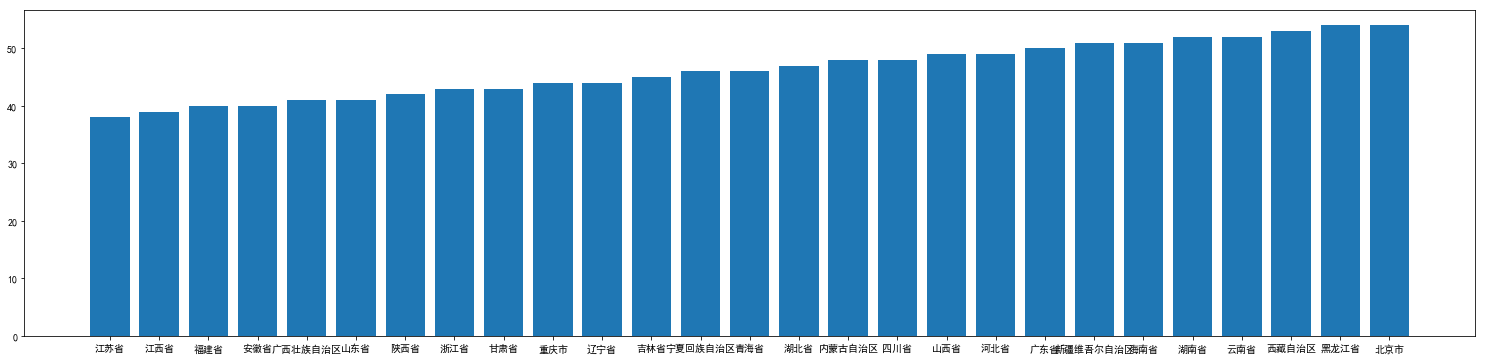

In [23]:
fig = plt.figure(figsize=(26,6))
plt.bar(province_list,length)
plt.show()

In [24]:
alcohol = range(80,1031,50)
length = []
for alco in alcohol:
    result = commit('浙江省', 0, 0, 0, 45, alco, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
    y_predict = opt.predict(result)
    length.append(int(y_predict))
length

[31,
 45,
 59,
 73,
 87,
 101,
 115,
 129,
 143,
 157,
 171,
 185,
 199,
 213,
 227,
 241,
 255,
 269,
 283,
 297]

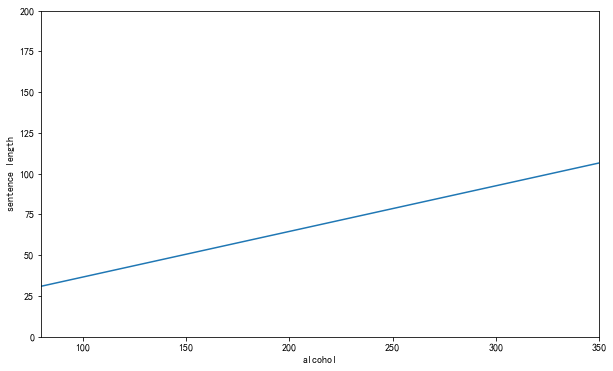

In [27]:
fig = plt.figure(figsize=(10,6))
plt.axis([80,350, 0, 200])
plt.xlabel('alcohol')
plt.ylabel('sentence length')
plt.plot(alcohol,length)
plt.show()

XGBOOST模型

In [29]:
model = xgb.XGBRegressor(max_depth=5, min_child_weight = 4, eta = 0.3, subsample = 0.7, colsample_bytree = 0.7,
learning_rate=0.1, n_estimators=160, objective='reg:gamma')
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             eta=0.3, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=160, n_jobs=4,
             num_parallel_tree=1, objective='reg:gamma', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [145]:
model.predict(X_test)

array([ 37.747066,  57.654903,  51.760937,  67.236275,  36.78036 ,
        92.31301 ,  49.782764,  37.726643,  32.56369 ,  47.52262 ,
        56.372395,  62.383823,  35.127266,  54.94695 ,  33.468506,
        36.3777  ,  61.65988 ,  75.673386,  54.27436 ,  63.212135,
        66.79659 ,  39.947956,  44.452435,  41.123352,  46.431225,
        47.106995,  58.381077,  50.17971 ,  62.819794,  72.91047 ,
        88.81915 ,  40.980705,  63.580544,  76.909355,  72.99779 ,
        77.61039 ,  52.977978,  45.14205 ,  57.798645,  75.52133 ,
        83.19466 ,  63.55869 ,  88.02162 ,  58.597668,  59.65934 ,
        70.1961  ,  67.389114,  55.219612,  37.45011 ,  58.267967,
        56.60766 ,  49.453056,  34.651154,  61.838757,  74.31387 ,
        42.811485,  48.99788 ,  54.113174,  44.007755,  53.99851 ,
        48.269817,  60.662094,  59.900295,  79.69077 ,  42.046635,
        42.333138,  49.7991  ,  62.102253,  62.049297,  61.89068 ,
        44.845272,  51.573414,  29.921997,  53.122837,  30.201

In [99]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [29]:
mean_absolute_error(model.predict(X_test), y_test)

14.578374308924522

进行XGboost调参，重点关注num_boost_roun，因为其最优值和其他参数有关

In [100]:
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'learning_rate': 0.1, 
    'n_estimators': 160,
    # Other parameters
    'objective':'reg:gamma',
}

In [101]:
params['eval_metric'] = "mae"
num_boost_round = 999


In [103]:
min_mae = float("Inf")
best_params = None
for objective in ['reg:squarederror',  'reg:pseudohubererror', 'reg:gamma', 'reg:tweedie']:
    print("CV with objective={}".format(objective))
    # We update our parameters
    params['objective'] = objective
    # Run and time CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics=['mae'],
        early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = objective
print("Best params: {}, MAE: {}".format(best_params, min_mae))


CV with objective=reg:squarederror
[19:45:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:45:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:45:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some paramet

In [35]:
params['objective'] = 'reg:gamma'

In [36]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(4,12)
    for min_child_weight in range(4,12)
]

In [37]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=4, min_child_weight=4
[17:02:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:02:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:02:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some pa

	MAE 13.429079999999999 for 222 rounds
CV with max_depth=4, min_child_weight=9
[17:02:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:02:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:02:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  Th

	MAE 13.364409999999998 for 200 rounds
CV with max_depth=5, min_child_weight=5
[17:03:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:03:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:03:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  Th

	MAE 13.372247199999999 for 184 rounds
CV with max_depth=5, min_child_weight=9
[17:03:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:03:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:03:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  Th

	MAE 13.334185200000002 for 155 rounds
CV with max_depth=6, min_child_weight=5
[17:03:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:03:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:03:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  Th

	MAE 13.369587800000001 for 145 rounds
CV with max_depth=6, min_child_weight=9
[17:03:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:03:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:03:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  Th

	MAE 13.3790244 for 112 rounds
CV with max_depth=7, min_child_weight=5
[17:03:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:03:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:03:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could

	MAE 13.3427842 for 136 rounds
CV with max_depth=7, min_child_weight=10
[17:04:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This coul

	MAE 13.4035082 for 101 rounds
CV with max_depth=8, min_child_weight=6
[17:04:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could

	MAE 13.412446799999998 for 106 rounds
CV with max_depth=8, min_child_weight=10
[17:04:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  T

	MAE 13.4267952 for 93 rounds
CV with max_depth=9, min_child_weight=6
[17:04:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could 

	MAE 13.461575800000002 for 81 rounds
CV with max_depth=9, min_child_weight=10
[17:04:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  Th

	MAE 13.4831634 for 85 rounds
CV with max_depth=10, min_child_weight=6
[17:04:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could

	MAE 13.4319806 for 82 rounds
CV with max_depth=10, min_child_weight=10
[17:05:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:05:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:05:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This coul

	MAE 13.4752064 for 85 rounds
CV with max_depth=11, min_child_weight=6
[17:05:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:05:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:05:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could

	MAE 13.410340999999999 for 86 rounds
CV with max_depth=11, min_child_weight=10
[17:05:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:05:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:05:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  T

In [38]:
params['max_depth'] = 6
params['min_child_weight'] = 4

In [39]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,9)]
    for colsample in [i/10. for i in range(5,9)]
]
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=20
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=0.8, colsample=0.8
[17:05:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:05:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:05:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some param

	MAE 13.356460799999999 for 144 rounds
CV with subsample=0.7, colsample=0.7
[17:06:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:06:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:06:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This 

	MAE 13.378564799999998 for 128 rounds
CV with subsample=0.6, colsample=0.6
[17:06:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:06:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:06:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This 

	MAE 13.421221399999999 for 151 rounds
CV with subsample=0.5, colsample=0.5
[17:06:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:06:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:06:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This 

In [40]:
params['subsample'] = 0.7
params['colsample_bytree'] = 0.7

In [41]:
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics=['mae'],
        early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))


CV with eta=0.3
[17:06:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:06:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:06:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by

	MAE 13.342660200000001 for 150 rounds

CV with eta=0.005
[17:06:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:06:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:06:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false a

In [42]:
params['eta'] = 0.3

In [113]:
maelist = []
for k in range(100,200,10):
    for l in [0.03,0.05,0.1,0.15,0.2,0.25]:
        model = xgb.XGBRegressor(max_depth =  6, min_child_weight = 4, eta = 0.3, subsample = 0.7, colsample_bytree = 0.7,
        learning_rate = l, n_estimators = k, objective = 'reg:gamma')
        model.fit(X_train,y_train)
        i = mean_absolute_error(model.predict(X_test), y_test)
        print(k, l , i)
        maelist.append(i)


100 0.03 48.13282640641735
100 0.05 25.520850089288526
100 0.1 14.63025032043457
100 0.15 14.570459597187657
100 0.2 14.643769120247134
100 0.25 14.929145079581968
110 0.03 45.75182713662424
110 0.05 21.018556717903383
110 0.1 14.505731718001828
110 0.15 14.608657546504851
110 0.2 14.669890609248991
110 0.25 14.969193390877017
120 0.03 42.912003298113426
120 0.05 18.095937204668598
120 0.1 14.490764822190808
120 0.15 14.68441283441359
120 0.2 14.738177121070123
120 0.25 15.013102926438854
130 0.03 39.62399389574605
130 0.05 16.379458519720263
130 0.1 14.449288632792811
130 0.15 14.760246023362683
130 0.2 14.719465605212797
130 0.25 15.065319583031439
140 0.03 35.959705237111734
140 0.05 15.501245235320061
140 0.1 14.385361399496755
140 0.15 14.728454405261624
140 0.2 14.804529113769531
140 0.25 15.106131707468341
150 0.03 32.02908048814343
150 0.05 15.094506439701203
150 0.1 14.396437614194808
150 0.15 14.685387253299837
150 0.2 14.821745391353485
150 0.25 15.073967629709552
160 0.03 2

In [115]:
min(maelist)

14.385361399496755

In [146]:
params['learning_rate'] = 0.1
params['n_estimators'] = 140

In [30]:
best_model = xgb.XGBRegressor(max_depth =  6, min_child_weight = 4, eta = 0.3, subsample = 0.7,
        colsample_bytree = 0.7, learning_rate = 0.1, n_estimators = 140, objective = 'reg:gamma')
best_model.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             eta=0.3, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=140, n_jobs=4,
             num_parallel_tree=1, objective='reg:gamma', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [31]:
best_model.predict(X_test)

array([ 65.2471  ,  50.593647,  66.154205,  54.99657 ,  83.962105,
        43.89427 ,  58.111835,  65.046425,  71.88957 , 106.34073 ,
        36.744915,  82.98182 ,  39.449463,  48.054012,  70.300575,
        76.723465,  71.75194 ,  82.30461 ,  40.763275,  44.903633,
        52.74268 ,  42.420937,  46.453537,  50.23686 ,  35.515152,
        98.50558 ,  34.577232,  57.184902,  32.01867 ,  38.31293 ,
        55.236732,  30.134312,  33.13198 ,  36.757576,  44.174446,
        44.506233,  65.87669 ,  77.246315,  30.534576,  29.53617 ,
        49.12197 ,  47.66786 ,  47.89394 ,  51.449986,  46.37102 ,
        48.94806 ,  36.730053,  97.410194,  62.254265,  32.53346 ,
        68.50406 ,  53.00054 ,  77.92425 ,  35.404655,  32.261486,
        40.133316,  57.98805 ,  42.50605 ,  53.29962 ,  69.813286,
        29.749731,  33.791412,  89.30035 ,  32.012417,  51.549946,
        50.3727  ,  47.98848 ,  82.45498 ,  65.53446 ,  39.103123,
        32.67538 ,  42.55311 ,  30.633636,  43.522717,  76.989

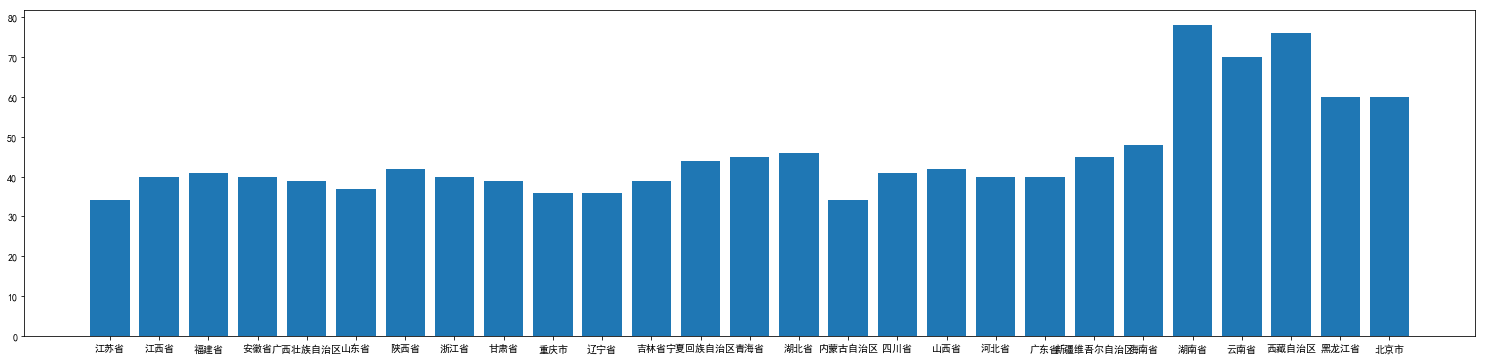

In [32]:
province_list = ['江苏省', '江西省', '福建省', '安徽省', '广西壮族自治区', 
    '山东省', '陕西省', '浙江省', '甘肃省','重庆市', '辽宁省', '吉林省', '宁夏回族自治区', 
    '青海省', '湖北省', '内蒙古自治区', '四川省','山西省', '河北省', '广东省', '新疆维吾尔自治区', 
    '海南省', '湖南省', '云南省', '西藏自治区', '黑龙江省', '北京市']
length = []
for province in province_list:
    result = commit(province, 0, 0, 0, 45, 120, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
    y_predict = best_model.predict(result)
    length.append(int(y_predict))
fig = plt.figure(figsize=(26,6))
plt.bar(province_list,length)
plt.show()

In [10]:
data.head()

,法院所属省,法官女性,少数民族,性别,年龄,血液乙醇浓度(单位:mg/100ml),如实供述,认罪认罚,顶替,逃逸,高速道路,事故,伤亡情况,全部责任,自首,谅解,无证驾驶,酒驾犯罪史,拘役(天)
0,1,0,0,0,57.0,110.0,1,1,0,0,0,0,0,0,0,0,0,0,30.0
1,1,0,0,0,52.0,115.2,1,1,0,0,0,1,0,0,0,0,0,0,45.0
2,1,0,0,0,47.0,106.0,1,1,0,0,0,0,0,0,0,0,0,0,30.0
3,1,0,0,0,25.0,156.9,1,1,0,0,0,1,0,0,0,0,0,0,60.0
4,1,0,0,0,42.0,163.6,1,1,0,0,0,0,0,0,0,0,0,0,60.0


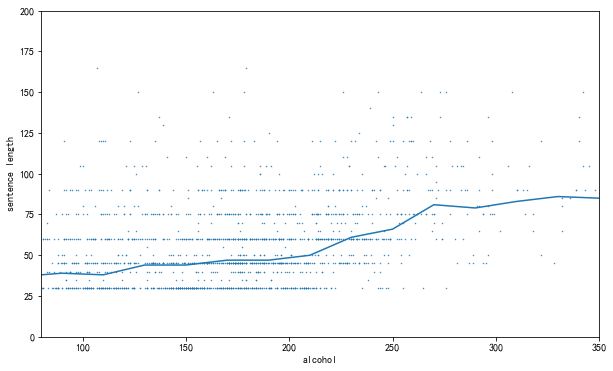

In [97]:
alcohol = range(50,400,20)
length = []
for alco in alcohol:
    result = commit('浙江省', 0, 0, 0, 45, alco, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
    y_predict = best_model.predict(result)
    length.append(int(y_predict))
fig = plt.figure(figsize=(10,6))
plt.axis([80, 350, 0, 200])
plt.xlabel('alcohol')
plt.ylabel('sentence length')
plt.plot(alcohol,length)
plt.scatter(data2['血液乙醇浓度(单位:mg/100ml)'], data2['拘役(天)'],s = 0.2)
plt.show()

In [45]:
data1 = data.sort_values(by = ['法院所属省'])
alco_zhejiang_realdata = []
sentence__zhejiang_realdata = []
data2 = data1[data1.法院所属省 == 8][['血液乙醇浓度(单位:mg/100ml)','拘役(天)']]
data4 = 

In [70]:
data2['血液乙醇浓度(单位:mg/100ml)']

1733    113.0
1874    364.0
5909    134.0
1730    244.0
1752    146.0
        ...  
4122    181.0
4363    143.0
459     180.2
656     230.0
2822    205.9
Name: 血液乙醇浓度(单位:mg/100ml), Length: 1719, dtype: float64

以下是将回归结果贴近现实值

In [34]:
predict_value = best_model.predict(X_test)

In [130]:
def gen_predicted_value(predict_value):
    for i in range(0, len(predict_value)):
        if predict_value[i] <= 39:
            predict_value[i] = 30
        if predict_value[i] <= 41 and predict_value[i] > 39:
            predict_value[i] = 40
        if predict_value[i] <= 48 and predict_value[i] > 41:
            predict_value[i] = 45
        if predict_value[i] <= 52.5 and predict_value[i] > 48:
            predict_value[i] = 50
        if predict_value[i] <= 66 and predict_value[i] > 52.5:
            predict_value[i] = 60
        if predict_value[i] <= 84 and predict_value[i] > 66:
            predict_value[i] = 75
        if predict_value[i] <= 105 and predict_value[i] > 84:
            predict_value[i] = 90
        if predict_value[i] > 105:
            predict_value[i] = 120
    return predict_value

In [131]:
y_predicted_gen = gen_predicted_value(predict_value)

In [132]:
mean_absolute_error(y_predicted_gen, y_test)

12.944516129032259

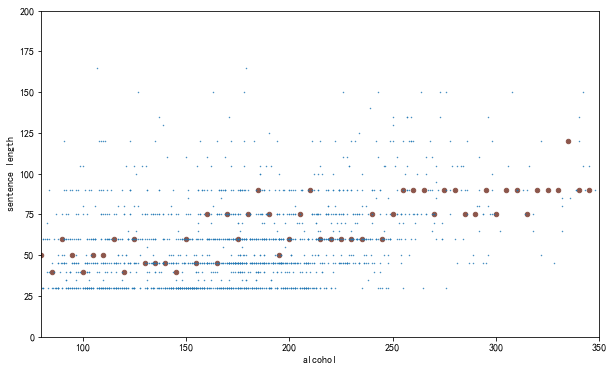

In [133]:
alcohol = range(50,350,5)
length = []
for alco in alcohol:
    result = commit('浙江省', random.randint(0,1), random.randint(0,1), random.randint(0,1), 45, alco, 1, 1, 0, random.randint(0,1), random.randint(0,1), random.randint(0,1), 0, random.randint(0,1), 0, random.randint(0,1), 0, random.randint(0,1))
    y_predict = best_model.predict(result)
    length.append(gen_predicted_value(y_predict))
fig = plt.figure(figsize=(10,6))
plt.axis([80, 350, 0, 200])
plt.xlabel('alcohol')
plt.ylabel('sentence length')
plt.scatter(alcohol,length, s=20, c = '#8c564b')
plt.scatter(data2['血液乙醇浓度(单位:mg/100ml)'], data2['拘役(天)'],s = 0.2)
plt.show()

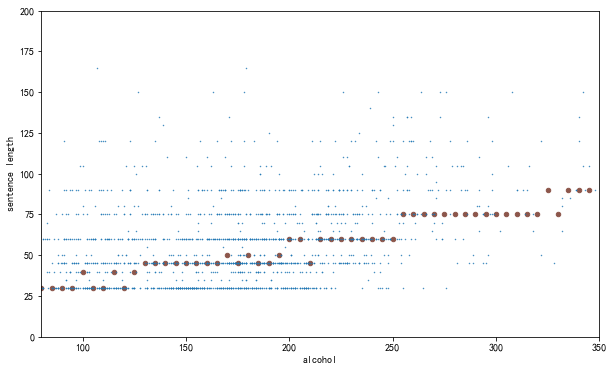

In [135]:
alcohol = range(50,350,5)
length = []
for alco in alcohol:
    result = commit('浙江省', random.randint(0,1), random.randint(0,1), random.randint(0,1), 45, alco, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, random.randint(0,1))
    y_predict = best_model.predict(result)
    length.append(gen_predicted_value(y_predict))
fig = plt.figure(figsize=(10,6))
plt.axis([80, 350, 0, 200])
plt.xlabel('alcohol')
plt.ylabel('sentence length')
plt.scatter(alcohol,length, s=20, c = '#8c564b')
plt.scatter(data2['血液乙醇浓度(单位:mg/100ml)'], data2['拘役(天)'],s = 0.2)
plt.show()

In [38]:
data3 = pd.read_csv('./perfect3.csv')

In [39]:
data3.head()

,法院所属省,法官姓名,法官性别预测,法官女性,判决时间,少数民族,性别,年龄,血液乙醇浓度(单位:mg/100ml),如实供述,...,事故,伤亡情况,全部责任,自首,谅解,无证驾驶,酒驾犯罪史,拘役(天),罚金(单位：元),缓刑
0,江苏省,蒋耀华,男,0,2019/12/10,0,0,57.0,110.0,1,...,0,0,0,0,0,0,0,30.0,1000,3.0
1,江苏省,吴中伟,男,0,2018/03/07,0,0,52.0,115.2,1,...,1,0,0,0,0,0,0,45.0,2000,2.0
2,江苏省,蒋耀华,男,0,2019/12/11,0,0,47.0,106.0,1,...,0,0,0,0,0,0,0,30.0,1000,NaN
3,江苏省,吴中伟,男,0,2018/03/07,0,0,25.0,156.9,1,...,1,0,0,0,0,0,0,60.0,2000,NaN
4,江苏省,吴中伟,男,0,2018/03/07,0,0,42.0,163.6,1,...,0,0,0,0,0,0,0,60.0,2000,4.0


In [41]:
data3 = data3.drop({'法官姓名','法官性别预测', '判决时间', '罚金(单位：元)', '拘役(天)'},axis = 1)
data3 = data3.dropna(axis = 0)

In [49]:
data4 = data3[data3.法院所属省 == 8][['血液乙醇浓度(单位:mg/100ml)','缓刑']]


In [42]:
data3['法院所属省'] = data3['法院所属省'].map(province_map)

In [43]:
train_size=0.8
X1 = data3.drop(columns = ['缓刑']).copy()
y1 = data3['缓刑']

# In the first step we will split the data in training and remaining dataset
X1_train, X1_rem, y1_train, y1_rem = train_test_split(X1,y1, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X1_valid, X1_test, y1_valid, y1_test = train_test_split(X1_rem,y1_rem, test_size=0.5)


In [44]:
best_model = xgb.XGBRegressor(max_depth =  6, min_child_weight = 4, eta = 0.3, subsample = 0.7,
        colsample_bytree = 0.7, learning_rate = 0.1, n_estimators = 140, objective = 'reg:gamma')
best_model.fit(X1_train,y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             eta=0.3, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=140, n_jobs=4,
             num_parallel_tree=1, objective='reg:gamma', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [63]:
def gen_predicted_huan(predict_value):
    for i in range(0, len(predict_value)):
        if predict_value[i] <= 2.6:
            predict_value[i] = 2
        if predict_value[i] <= 3.5 and predict_value[i] > 2.6:
            predict_value[i] = 3
        if predict_value[i] <= 4.5 and predict_value[i] > 3.6:
            predict_value[i] = 4
        if predict_value[i] <= 5.5 and predict_value[i] > 4.6:
            predict_value[i] = 5
        if predict_value[i] <= 6.5 and predict_value[i] > 5.6:
            predict_value[i] = 6
        if predict_value[i] <= 7.5 and predict_value[i] > 6.6:
            predict_value[i] = 7
        if predict_value[i] > 7.5:
            predict_value[i] = 8
    return predict_value

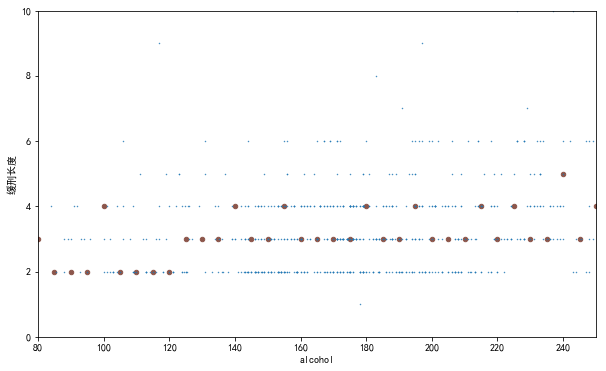

In [64]:
alcohol = range(50,350,5)
length = []
for alco in alcohol:
    result = commit('浙江省', random.randint(0,1), random.randint(0,1), random.randint(0,1), 45, alco, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, random.randint(0,1))
    y_predict = best_model.predict(result)
    length.append(gen_predicted_huan(y_predict))
fig = plt.figure(figsize=(10,6))
plt.axis([80, 250, 0, 10])
plt.xlabel('alcohol')
plt.ylabel('缓刑长度')
plt.scatter(alcohol,length, s=20, c = '#8c564b')
plt.scatter(data4['血液乙醇浓度(单位:mg/100ml)'], data4['缓刑'],s = 0.2)
plt.show()

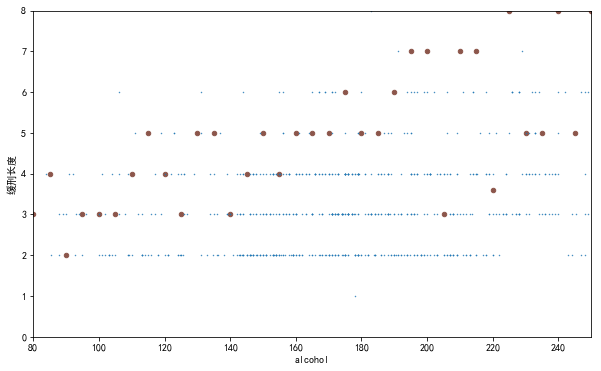

In [76]:
alcohol = range(50,350,5)
length = []
for alco in alcohol:
    result = commit('浙江省', random.randint(0,1), random.randint(0,1), random.randint(0,1), 45, alco, 1, 1, 0, random.randint(0,1), random.randint(0,1), random.randint(0,1), 0, random.randint(0,1), 0, random.randint(0,1), 0, random.randint(0,1))
    y_predict = best_model.predict(result)
    length.append(gen_predicted_huan((y_predict)))
fig = plt.figure(figsize=(10,6))
plt.axis([80, 250, 0, 8])
plt.xlabel('alcohol')
plt.ylabel('缓刑长度')
plt.scatter(alcohol,length, s=20, c = '#8c564b')
plt.scatter(data4['血液乙醇浓度(单位:mg/100ml)'], data4['缓刑'],s = 0.2)
plt.show()